In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
sv = pd.read_csv("../sfs/SV.af.txt", sep='\t', names=["var type", "AF"])

In [4]:
snp = pd.read_csv("../sfs/sample.shuffle.snp.af.txt", sep='\t', names=["AF"])

In [5]:
snp['var type'] = "SNP"
data = pd.concat([sv, snp])
data['rare'] = data['AF'] < 0.01

Text(0.5, 0.98, 'Site frequency spectrum')

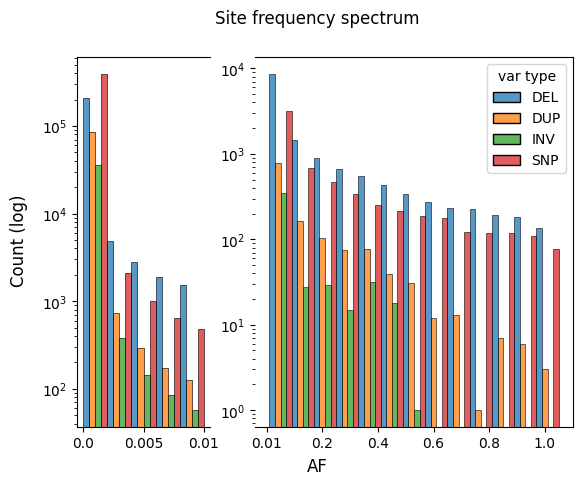

In [6]:
f, (a0, a1) = plt.subplots(1, 2, width_ratios=[1.25, 3])

p = sb.histplot(data=data[data['rare']], x="AF", hue="var type", binwidth=0.002, multiple='dodge', ax=a0)
p.set(yscale="log", ylabel="", xlabel="")
a0.get_legend().remove()
a0.spines['right'].set_visible(False)

ticks_loc = a0.get_xticks().tolist()[1:-1]
a0.set_xticks(ticks_loc)
a0.set_xticklabels([0.0, 0.005, 0.01])

p = sb.histplot(data=data[~data['rare']], x="AF", hue="var type", binwidth=0.08, multiple='dodge', ax=a1)
p.set(yscale="log", ylabel="", xlabel="")
a1.spines['left'].set_visible(False)

ticks_loc = a1.get_xticks().tolist()[1:-1]
a1.set_xticks(ticks_loc)
a1.set_xticklabels([0.01, 0.2, 0.4, 0.6, 0.8, 1.0])#[label_format.format(x) for x in ticks_loc])

#f.text(0.5, 0.04, 'AF', ha='center', va='center')
f.supxlabel('AF')
f.supylabel('Count (log)')
f.suptitle("Site frequency spectrum")

In [10]:
data.head()

,var type,AF,rare
0,DEL,0.000004,True
1,DEL,0.000004,True
2,DEL,0.000004,True
3,DEL,0.033894,False
4,DEL,0.000050,True


In [58]:
from scipy.stats import pearsonr

m_snp = data[data["var type"] == "SNP"]["AF"].dropna().sort_values()
m_sv = data[data["var type"] != "SNP"]["AF"].dropna().sort_values()
k_max = min(len(m_snp), len(m_sv))

a = m_snp.sample(k_max).sort_values()
b = m_sv.sample(k_max).sort_values()
pearsonr(a, b)

PearsonRResult(statistic=0.9183643722713652, pvalue=0.0)

Text(0, 0.5, 'SV AF')

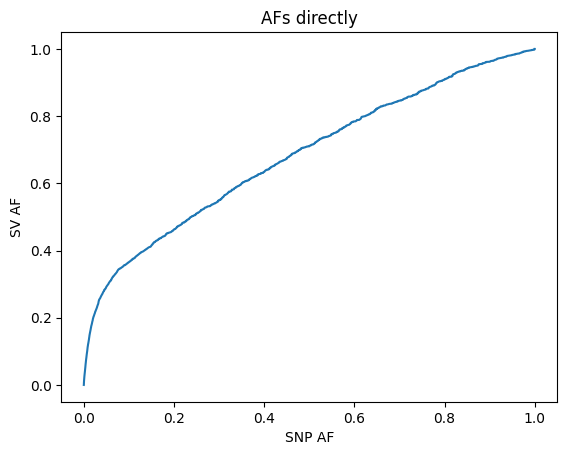

In [68]:
plt.plot(a.values, b.values)
plt.title("AFs directly")
plt.xlabel("SNP AF")
plt.ylabel("SV AF")

In [77]:
bins =list(np.arange(0, 1.0, 0.001)) # list(np.arange(0.0, 0.01, 0.002)) + 

In [81]:
len(bins)

1000

In [78]:
data['afbin'] = pd.cut(data['AF'], bins)

In [79]:
a = data[data["var type"] == "SNP"]["afbin"].value_counts()
b = data[data["var type"] != "SNP"]["afbin"].value_counts()
pearsonr(a, b)

PearsonRResult(statistic=0.9998065496472672, pvalue=0.0)

Text(0, 0.5, 'SV AF')

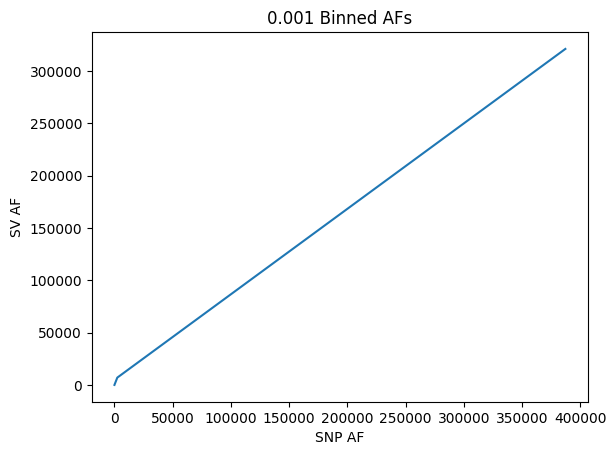

In [82]:
plt.plot(a, b)
plt.title("0.001 Binned AFs")
plt.xlabel("SNP AF")
plt.ylabel("SV AF")

In [32]:
plt.plot(a, b)

array([[1.        , 0.54599043],
       [0.54599043, 1.        ]])